<a href="https://colab.research.google.com/github/kimhwijin/HandsOnMachineLearing/blob/main/Data_API_13.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot
import numpy as np
import os

# 데이터셋 API

In [3]:
X = tf.range(10)
dataset = tf.data.Dataset.from_tensor_slices(X)
#dataset = tf.data.Dataset.range(10)
print(X, dataset)
for item in dataset:
    print(item)

tf.Tensor([0 1 2 3 4 5 6 7 8 9], shape=(10,), dtype=int32) <TensorSliceDataset shapes: (), types: tf.int32>
tf.Tensor(0, shape=(), dtype=int32)
tf.Tensor(1, shape=(), dtype=int32)
tf.Tensor(2, shape=(), dtype=int32)
tf.Tensor(3, shape=(), dtype=int32)
tf.Tensor(4, shape=(), dtype=int32)
tf.Tensor(5, shape=(), dtype=int32)
tf.Tensor(6, shape=(), dtype=int32)
tf.Tensor(7, shape=(), dtype=int32)
tf.Tensor(8, shape=(), dtype=int32)
tf.Tensor(9, shape=(), dtype=int32)


In [4]:
#연쇄 변환
dataset = dataset.repeat(3).batch(7)
for item in dataset:
    print(item)

tf.Tensor([0 1 2 3 4 5 6], shape=(7,), dtype=int32)
tf.Tensor([7 8 9 0 1 2 3], shape=(7,), dtype=int32)
tf.Tensor([4 5 6 7 8 9 0], shape=(7,), dtype=int32)
tf.Tensor([1 2 3 4 5 6 7], shape=(7,), dtype=int32)
tf.Tensor([8 9], shape=(2,), dtype=int32)


In [5]:
#데이터셋 할당받지않으면 데이터가 다 날라감
dataset.repeat(3).batch(7)
print(dataset)
dataset = tf.data.Dataset.from_tensor_slices(X).repeat(3).batch(7)

<BatchDataset shapes: (None,), types: tf.int32>


In [6]:
dataset = dataset.map(lambda x: x * 2)
for item in dataset:
    print(item)

dataset = dataset.unbatch()
dataset = dataset.filter(lambda x: x < 10)

for item in dataset.take(3):
    print(item)

tf.Tensor([ 0  2  4  6  8 10 12], shape=(7,), dtype=int32)
tf.Tensor([14 16 18  0  2  4  6], shape=(7,), dtype=int32)
tf.Tensor([ 8 10 12 14 16 18  0], shape=(7,), dtype=int32)
tf.Tensor([ 2  4  6  8 10 12 14], shape=(7,), dtype=int32)
tf.Tensor([16 18], shape=(2,), dtype=int32)
tf.Tensor(0, shape=(), dtype=int32)
tf.Tensor(2, shape=(), dtype=int32)
tf.Tensor(4, shape=(), dtype=int32)


In [7]:
tf.random.set_seed(42)

dataset = tf.data.Dataset.range(10).repeat(3)
dataset = dataset.shuffle(buffer_size=3, seed=42).batch(7)
for item in dataset:
    print(item)

tf.Tensor([1 3 0 4 2 5 6], shape=(7,), dtype=int64)
tf.Tensor([8 7 1 0 3 2 5], shape=(7,), dtype=int64)
tf.Tensor([4 6 9 8 9 7 0], shape=(7,), dtype=int64)
tf.Tensor([3 1 4 5 2 8 7], shape=(7,), dtype=int64)
tf.Tensor([6 9], shape=(2,), dtype=int64)


In [8]:
#셔플 후 반복
dataset = tf.data.Dataset.range(10).shuffle(buffer_size=3)
for item in dataset:
    print(item)
print("---")
dataset = dataset.repeat(3)
for item in dataset:
    print(item)

tf.Tensor(0, shape=(), dtype=int64)
tf.Tensor(2, shape=(), dtype=int64)
tf.Tensor(4, shape=(), dtype=int64)
tf.Tensor(3, shape=(), dtype=int64)
tf.Tensor(1, shape=(), dtype=int64)
tf.Tensor(5, shape=(), dtype=int64)
tf.Tensor(8, shape=(), dtype=int64)
tf.Tensor(7, shape=(), dtype=int64)
tf.Tensor(9, shape=(), dtype=int64)
tf.Tensor(6, shape=(), dtype=int64)
---
tf.Tensor(2, shape=(), dtype=int64)
tf.Tensor(0, shape=(), dtype=int64)
tf.Tensor(4, shape=(), dtype=int64)
tf.Tensor(5, shape=(), dtype=int64)
tf.Tensor(1, shape=(), dtype=int64)
tf.Tensor(3, shape=(), dtype=int64)
tf.Tensor(6, shape=(), dtype=int64)
tf.Tensor(9, shape=(), dtype=int64)
tf.Tensor(8, shape=(), dtype=int64)
tf.Tensor(7, shape=(), dtype=int64)
tf.Tensor(1, shape=(), dtype=int64)
tf.Tensor(0, shape=(), dtype=int64)
tf.Tensor(4, shape=(), dtype=int64)
tf.Tensor(5, shape=(), dtype=int64)
tf.Tensor(6, shape=(), dtype=int64)
tf.Tensor(7, shape=(), dtype=int64)
tf.Tensor(2, shape=(), dtype=int64)
tf.Tensor(8, shape=(), d

# Split_Dataset

In [9]:
#데이터셋을 여러파일로 나누기
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#데이터셋 불러오기
housing = fetch_california_housing()
X_train_full, X_test, y_train_full, y_test = train_test_split(
    housing.data, housing.target.reshape(-1, 1), random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full, random_state=42)

#정규화
scaler = StandardScaler()
scaler.fit(X_train)
X_mean = scaler.mean_
X_std = scaler.scale_

In [10]:
#
def save_to_multiple_csv_files(data, name_prefix, header=None, n_parts=10):
    housing_dir = os.path.join("datasets", "housing")
    os.makedirs(housing_dir, exist_ok=True)
    path_format = os.path.join(housing_dir, "my_{}_{:02d}.csv")

    filepaths = []
    #데이터 개수를, 파일 개수로 split
    m = len(data)
    for file_idx, row_indices in enumerate(np.array_split(np.arange(m), n_parts)):
        part_csv = path_format.format(name_prefix, file_idx)
        filepaths.append(part_csv)
        #파일생성
        with open(part_csv, "wt", encoding="utf-8") as f:
            #헤더 작성
            if header is not None:
                f.write(header)
                f.write("\n")
            #데이터 작성
            for row_idx in row_indices:
                f.write(",".join([repr(col) for col in data[row_idx]]))
                f.write("\n")
    return filepaths

train_data = np.c_[X_train, y_train]
valid_data = np.c_[X_valid, y_valid]
test_data = np.c_[X_test, y_test]
header_cols = housing.feature_names + ["MedianHouseValue"]
header = ",".join(header_cols)

train_filepaths = save_to_multiple_csv_files(train_data, "train", header, n_parts=20)
valid_filepaths = save_to_multiple_csv_files(valid_data, "valid", header, n_parts=10)
test_filepaths = save_to_multiple_csv_files(test_data, "test", header, n_parts=10)

In [11]:
import pandas as pd

print(pd.read_csv(train_filepaths[0]).head())

with open(train_filepaths[0]) as f:
    for i in range(5):
        print(f.readline(), end="")

   MedInc  HouseAge  AveRooms  ...  Latitude  Longitude  MedianHouseValue
0  3.5214      15.0  3.049945  ...     37.63    -122.43             1.442
1  5.3275       5.0  6.490060  ...     33.69    -117.39             1.687
2  3.1000      29.0  7.542373  ...     38.44    -122.98             1.621
3  7.1736      12.0  6.289003  ...     33.55    -117.70             2.621
4  2.0549      13.0  5.312457  ...     33.93    -116.93             0.956

[5 rows x 9 columns]
MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedianHouseValue
3.5214,15.0,3.0499445061043287,1.106548279689234,1447.0,1.6059933407325193,37.63,-122.43,1.442
5.3275,5.0,6.490059642147117,0.9910536779324056,3464.0,3.4433399602385686,33.69,-117.39,1.687
3.1,29.0,7.5423728813559325,1.5915254237288134,1328.0,2.2508474576271187,38.44,-122.98,1.621
7.1736,12.0,6.289002557544757,0.9974424552429667,1054.0,2.6956521739130435,33.55,-117.7,2.621


In [12]:
#파일 경로에서 데이터셋 생성하기
filepath_dataset = tf.data.Dataset.list_files(train_filepaths, seed=42)

#한번에 5개 데이터를 읽는 데이터셋, 맨처음 줄은 열이기 때문에 스킵한다.
n_readers = 5
dataset = filepath_dataset.interleave(
    lambda filepath: tf.data.TextLineDataset(filepath).skip(1),
    cycle_length=n_readers)

for line in dataset.take(5):
    print(line.numpy())

b'4.7361,7.0,7.464968152866242,1.1178343949044587,846.0,2.694267515923567,34.49,-117.27,1.745'
b'3.6641,17.0,5.577142857142857,1.1542857142857144,511.0,2.92,40.85,-121.07,0.808'
b'4.5909,16.0,5.475877192982456,1.0964912280701755,1357.0,2.9758771929824563,33.63,-117.71,2.418'
b'3.6875,44.0,4.524475524475524,0.993006993006993,457.0,3.195804195804196,34.04,-118.15,1.625'
b'2.3,25.0,5.828178694158075,0.9587628865979382,909.0,3.1237113402061856,36.25,-119.4,1.328'


# Preprocessing

In [13]:
n_inputs = 8 # X_train.shape[-1]

@tf.function
def preprocess(line):
    #컬럼 기본값
    defs = [0.] * n_inputs + [tf.constant([], dtype=tf.float32)]
    #컬럼당 1개씩 1차원 백터를 만든다.
    fields = tf.io.decode_csv(line, record_defaults=defs)
    #레이블 제외한 컬럼들을 뭉침
    x = tf.stack(fields[:-1])
    #레이블 컬럼
    y = tf.stack(fields[-1:])
    return (x - X_mean) / X_std, y

# DataPipeline

In [14]:
def csv_reader_dataset(filepaths, repeat=1, n_readers=5,
                       n_read_threads=None, shuffle_buffer_size=10000,
                       n_parse_threads=5, batch_size=32):
    #파일리스트
    dataset = tf.data.Dataset.list_files(filepaths).repeat(repeat)
    #n개의 TextLineDataset를 생성함
    dataset = dataset.interleave(
        lambda filepath: tf.data.TextLineDataset(filepath).skip(1),
        cycle_length=n_readers, num_parallel_calls=n_read_threads)
    #데이터셋 셔플
    dataset = dataset.shuffle(shuffle_buffer_size)
    #csv파일 decode 및 정규화
    dataset = dataset.map(preprocess, num_parallel_calls=n_parse_threads)
    #배치
    dataset = dataset.batch(batch_size)
    #프리패치
    return dataset.prefetch(1)


tf.random.set_seed(42)
#example
train_set = csv_reader_dataset(train_filepaths, batch_size=3)
for X_batch, y_batch in train_set.take(2):
    print("X =", X_batch)
    print("y =", y_batch)
    print()

X = tf.Tensor(
[[ 0.5804519  -0.20762321  0.05616303 -0.15191229  0.01343246  0.00604472
   1.2525111  -1.3671792 ]
 [ 5.818099    1.8491895   1.1784915   0.28173092 -1.2496178  -0.3571987
   0.7231292  -1.0023477 ]
 [-0.9253566   0.5834586  -0.7807257  -0.28213993 -0.36530012  0.27389365
  -0.76194876  0.72684526]], shape=(3, 8), dtype=float32)
y = tf.Tensor(
[[1.752]
 [1.313]
 [1.535]], shape=(3, 1), dtype=float32)

X = tf.Tensor(
[[-0.8324941   0.6625668  -0.20741376 -0.18699841 -0.14536144  0.09635526
   0.9807942  -0.67250353]
 [-0.62183803  0.5834586  -0.19862501 -0.3500319  -1.1437552  -0.3363751
   1.107282   -0.8674123 ]
 [ 0.8683102   0.02970133  0.3427381  -0.29872298  0.7124906   0.28026953
  -0.72915536  0.86178064]], shape=(3, 8), dtype=float32)
y = tf.Tensor(
[[0.919]
 [1.028]
 [2.182]], shape=(3, 1), dtype=float32)



# Dataset_Train

In [15]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)


batch_size = 32

train_set = csv_reader_dataset(train_filepaths, repeat=None)
valid_set = csv_reader_dataset(valid_filepaths)
test_set = csv_reader_dataset(test_filepaths)

model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dense(1),
])

model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-3))

model.fit(train_set, steps_per_epoch=len(X_train) // batch_size, epochs=10,
          validation_data=valid_set)

Epoch 1/10
362/362 [==============================] - 2s 4ms/step - loss: 1.7443 - val_loss: 1.5302
Epoch 2/10
362/362 [==============================] - 1s 3ms/step - loss: 0.8780 - val_loss: 1.0380
Epoch 3/10
362/362 [==============================] - 1s 3ms/step - loss: 0.7399 - val_loss: 0.7188
Epoch 4/10
362/362 [==============================] - 1s 3ms/step - loss: 0.7234 - val_loss: 0.6914
Epoch 5/10
362/362 [==============================] - 1s 3ms/step - loss: 0.6817 - val_loss: 0.8448
Epoch 6/10
362/362 [==============================] - 1s 3ms/step - loss: 0.6367 - val_loss: 0.9235
Epoch 7/10
362/362 [==============================] - 1s 3ms/step - loss: 0.6032 - val_loss: 0.6490
Epoch 8/10
362/362 [==============================] - 1s 3ms/step - loss: 0.5945 - val_loss: 0.5858
Epoch 9/10
362/362 [==============================] - 1s 3ms/step - loss: 0.5454 - val_loss: 0.5139
Epoch 10/10
362/362 [==============================] - 1s 3ms/step - loss: 0.5092 - val_loss: 0.5005

In [16]:
model.evaluate(test_set, steps=len(X_test) // batch_size)

#batch_size = 32 이고, 3개를 꺼내니깐 총 96개의 데이터가 나옴
new_set = test_set.take(3).map(lambda X, y: X)
print(model.predict(new_set, steps=3)[:10], "...")

161/161 [==============================] - 0s 2ms/step - loss: 0.5101
[[2.3755412]
 [1.2065188]
 [2.7696793]
 [1.0552754]
 [1.1152054]
 [2.8351665]
 [4.0295763]
 [1.6805081]
 [2.0749662]
 [1.4989965]] ...


# Custom_Dataset_Train

In [17]:
#모델 초기화
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dense(1),
]) 


optimizer = keras.optimizers.Nadam(learning_rate=1e-3)
loss_fn = keras.losses.mean_squared_error

n_epochs = 5
batch_size = 32
#배치가 32일때 전체 데이터셋을 사용하는 반복수
n_steps_per_epoch = len(X_train) // batch_size
#훈련 전체 배치 반복수
total_steps = n_epochs * n_steps_per_epoch
#
global_step = 0

#repeat = none 이기때문에 무한으로 반복하면서 불러들인다.
for X_batch, y_batch in train_set.take(total_steps):
    global_step += 1
    print("\rGlobal step {}/{}".format(global_step, total_steps), end="")
    #연산 기록
    with tf.GradientTape() as tape:
        #정방향
        y_pred = model(X_batch)
        #mse 로스 계산
        main_loss = tf.reduce_mean(loss_fn(y_batch, y_pred))
        #로스 더하면서 축적
        loss = tf.add_n([main_loss] + model.losses)
    #기울기
    gradients = tape.gradient(loss, model.trainable_variables)
    #적용
    optimizer.apply_gradients(zip(gradients, model.trainable_variables))

Global step 1810/1810

In [18]:
#batch_size = 32 이고, 3개를 꺼내니깐 총 96개의 데이터가 나옴
new_set = test_set.take(3).map(lambda X, y: X)
print(model.predict(new_set, steps=3)[:10], "...")

[[1.2189548]
 [1.9589493]
 [2.333459 ]
 [1.9184028]
 [1.3492503]
 [1.2805662]
 [2.3112993]
 [3.087468 ]
 [3.7603316]
 [1.3345376]] ...


In [19]:
#
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dense(1),
]) 

@tf.function
def train(model, n_epochs, batch_size=32, n_readers=5, n_read_threads=5, shuffle_buffer_size=10000, n_parse_threads=5):
    train_set = csv_reader_dataset(train_filepaths, repeat=n_epochs, n_readers=n_readers, n_read_threads=n_read_threads, shuffle_buffer_size=shuffle_buffer_size,
                                   n_parse_threads=n_parse_threads, batch_size=batch_size)
    
    
    n_steps_per_epoch = len(X_train) // batch_size
    total_steps = n_epochs * n_steps_per_epoch
    global_step = 0
    for X_batch, y_batch in train_set.take(total_steps):
        global_step += 1
        if tf.equal(global_step % 100, 0):
            tf.print("\rGlobal step", global_step, "/", total_steps)
        with tf.GradientTape() as tape:
            y_pred = model(X_batch)
            main_loss = tf.reduce_mean(loss_fn(y_batch, y_pred))
            loss = tf.add_n([main_loss] + model.losses)
        gradients = tape.gradient(loss, model.trainable_variables)
        optimizer.apply_gradients(zip(gradients, model.trainable_variables))

train(model, n_epochs=5)


Global step 100 / 1810
Global step 200 / 1810
Global step 300 / 1810
Global step 400 / 1810
Global step 500 / 1810
Global step 600 / 1810
Global step 700 / 1810
Global step 800 / 1810
Global step 900 / 1810
Global step 1000 / 1810
Global step 1100 / 1810
Global step 1200 / 1810
Global step 1300 / 1810
Global step 1400 / 1810
Global step 1500 / 1810
Global step 1600 / 1810
Global step 1700 / 1810
Global step 1800 / 1810


In [20]:
print(model.predict(new_set, steps=3)[:10], "...")

[[1.254848 ]
 [2.9012942]
 [0.5429542]
 [2.718118 ]
 [4.4748564]
 [1.6411183]
 [1.1150392]
 [3.0916648]
 [3.626108 ]
 [1.6176571]] ...


In [21]:
#데이터셋 메서드 설명
for m in dir(tf.data.Dataset):
    if not (m.startswith("_") or m.endswith("_")):
        func = getattr(tf.data.Dataset, m)
        if hasattr(func, "__doc__"):
            print("● {:21s}{}".format(m + "()", func.__doc__.split("\n")[0]))

● apply()              Applies a transformation function to this dataset.
● as_numpy_iterator()  Returns an iterator which converts all elements of the dataset to numpy.
● batch()              Combines consecutive elements of this dataset into batches.
● bucket_by_sequence_length()A transformation that buckets elements in a `Dataset` by length.
● cache()              Caches the elements in this dataset.
● cardinality()        Returns the cardinality of the dataset, if known.
● choose_from_datasets()Creates a dataset that deterministically chooses elements from `datasets`.
● concatenate()        Creates a `Dataset` by concatenating the given dataset with this dataset.
● element_spec()       The type specification of an element of this dataset.
● enumerate()          Enumerates the elements of this dataset.
● filter()             Filters this dataset according to `predicate`.
● flat_map()           Maps `map_func` across this dataset and flattens the result.
● from_generator()     Create

# TFRecord

In [22]:
#바이트 스트링을 tfrecord로 변환후 저장 및 불러오기
with tf.io.TFRecordWriter("my_data.tfrecord") as f:
    f.write(b"This is the first record")
    f.write(b"And this is the second record")

filepaths = ["my_data.tfrecord"]
dataset = tf.data.TFRecordDataset(filepaths)
for item in dataset:
    print(item)

tf.Tensor(b'This is the first record', shape=(), dtype=string)
tf.Tensor(b'And this is the second record', shape=(), dtype=string)


In [23]:
options = tf.io.TFRecordOptions(compression_type="GZIP")
with tf.io.TFRecordWriter("my_compressed.tfrecord", options) as f:
    f.write(b"This is the first record")
    f.write(b"And this is the second record")

dataset = tf.data.TFRecordDataset(["my_compressed.tfrecord"], compression_type="GZIP")
for item in dataset:
    print(item)

tf.Tensor(b'This is the first record', shape=(), dtype=string)
tf.Tensor(b'And this is the second record', shape=(), dtype=string)



# TFRecord_Protocol_Buffer

In [24]:
%%writefile person.proto
syntax = "proto3";
message Person {
  string name = 1;
  int32 id = 2;
  repeated string email = 3;
}

Writing person.proto


In [25]:
!protoc person.proto --python_out=/content --descriptor_set_out=person.desc --include_imports

In [26]:
!ls person*


person.desc  person_pb2.py  person.proto


In [27]:
from person_pb2 import Person

person = Person(name="Al", id=123, email=["a@b.com"]) 
print(person) 
print(type(person.id))
print(person.email)
person.email.append("email.com")
print(person.email)

#바이트 문자열로 직렬화 변환
s = person.SerializeToString() 
print(s)

name: "Al"
id: 123
email: "a@b.com"

<class 'int'>
['a@b.com']
['a@b.com', 'email.com']
b'\n\x02Al\x10{\x1a\x07a@b.com\x1a\temail.com'


In [28]:
#tf.io.decode_proto 메서드를 통해서
person_tf = tf.io.decode_proto(
    bytes=s,
    message_type="Person",
    field_names=["name", "id", "email"],
    output_types=[tf.string, tf.int32, tf.string],
    descriptor_source="person.desc")

person_tf.values

[<tf.Tensor: shape=(1,), dtype=string, numpy=array([b'Al'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([123], dtype=int32)>,
 <tf.Tensor: shape=(2,), dtype=string, numpy=array([b'a@b.com', b'email.com'], dtype=object)>]

In [29]:
#Example 생성후 직렬화하고 TFrecord로 저장하기
from tensorflow.train import BytesList, FloatList, Int64List
from tensorflow.train import Feature, Features, Example

person_example = Example(
    features=Features(
        feature={
            "name": Feature(bytes_list=BytesList(value=[b"Alice"])),
            "id": Feature(int64_list=Int64List(value=[123])),
            "emails": Feature(bytes_list=BytesList(value=[b"a@b.com", b"c@d.com"]))
        }))

with tf.io.TFRecordWriter("my_contacts.tfrecord") as f:
    f.write(person_example.SerializeToString())
 


In [30]:
feature_description = {
                       "name" : tf.io.FixedLenFeature([], tf.string, default_value=""),
                       "id" : tf.io.FixedLenFeature([], tf.int64, default_value=0),
                       "emails" : tf.io.VarLenFeature(tf.string),

}

for serialized_example in tf.data.TFRecordDataset(["my_contacts.tfrecord"]):
    parsed_example = tf.io.parse_single_example(serialized_example, feature_description)
    print(parsed_example)

{'emails': <tensorflow.python.framework.sparse_tensor.SparseTensor object at 0x7f9b7f7f7e50>, 'id': <tf.Tensor: shape=(), dtype=int64, numpy=123>, 'name': <tf.Tensor: shape=(), dtype=string, numpy=b'Alice'>}


# TFReord_Load_Image

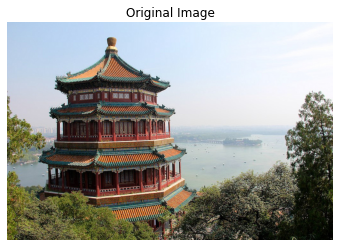

In [31]:
#image 불러와서
from sklearn.datasets import load_sample_images
import matplotlib.pyplot as plt

img = load_sample_images()["images"][0]
plt.imshow(img)
plt.axis("off")
plt.title("Original Image")
plt.show()


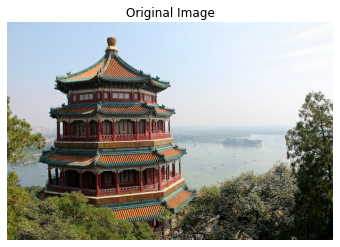

In [32]:
data = tf.io.encode_jpeg(img)
example_with_data = Example(features=Features(feature={
    "image": Feature(bytes_list=BytesList(value=[data.numpy()]))}))
serialized_example = example_with_data.SerializeToString()


feature_description = { "image": tf.io.VarLenFeature(tf.string) }
example_with_image = tf.io.parse_single_example(serialized_example, feature_description)
decoded_img = tf.io.decode_jpeg(example_with_image["image"].values[0])

plt.imshow(decoded_img)
plt.axis("off")
plt.title("Original Image")
plt.show()

# TFRecord_Serialize_Tensor

In [33]:
t = tf.constant([[0., 1.], [2., 3.], [4., 5.]])
s = tf.io.serialize_tensor(t)
tst = tf.io.parse_tensor(s, out_type=tf.float32)

print(t,s,tst, sep='\n')


tf.Tensor(
[[0. 1.]
 [2. 3.]
 [4. 5.]], shape=(3, 2), dtype=float32)
tf.Tensor(b'\x08\x01\x12\x08\x12\x02\x08\x03\x12\x02\x08\x02"\x18\x00\x00\x00\x00\x00\x00\x80?\x00\x00\x00@\x00\x00@@\x00\x00\x80@\x00\x00\xa0@', shape=(), dtype=string)
tf.Tensor(
[[0. 1.]
 [2. 3.]
 [4. 5.]], shape=(3, 2), dtype=float32)


In [34]:
#SequenceTensor
from tensorflow.train import FeatureList, FeatureLists, SequenceExample

#문맥 설명 Features
context = Features(feature={
    "author_id": Feature(int64_list=Int64List(value=[123])),
    "title": Feature(bytes_list=BytesList(value=[b"A", b"desert", b"place", b"."])),
    "pub_date": Feature(int64_list=Int64List(value=[1623, 12, 25]))
})

content = [["When", "shall", "we", "three", "meet", "again", "?"],
           ["In", "thunder", ",", "lightning", ",", "or", "in", "rain", "?"]]
comments = [["When", "the", "hurlyburly", "'s", "done", "."],
            ["When", "the", "battle", "'s", "lost", "and", "won", "."]]

def words_to_feature(words):
    return Feature(bytes_list=BytesList(value=[word.encode("utf-8")
                                               for word in words]))

#Feature List
content_features = [words_to_feature(sentence) for sentence in content]
comments_features = [words_to_feature(comment) for comment in comments]


sequence_example = SequenceExample(
    #문맥
    context=context,
    #Feature Lists
    feature_lists=FeatureLists(feature_list={
        "content": FeatureList(feature=content_features),
        "comments": FeatureList(feature=comments_features)
    }))
print("sequence_example :", type(sequence_example))

serialized_sequence_example = sequence_example.SerializeToString()
print("serialized_sequence_example :", type(serialized_sequence_example))

#특성 설명
context_feature_descriptions = {
    "author_id": tf.io.FixedLenFeature([], tf.int64, default_value=0),
    "title": tf.io.VarLenFeature(tf.string),
    "pub_date": tf.io.FixedLenFeature([3], tf.int64, default_value=[0, 0, 0]),
}
sequence_feature_descriptions = {
    "content": tf.io.VarLenFeature(tf.string),
    "comments": tf.io.VarLenFeature(tf.string),
}

#시리얼화 프로토콜 파싱
parsed_context, parsed_feature_lists = tf.io.parse_single_sequence_example(
    serialized_sequence_example, context_feature_descriptions,
    sequence_feature_descriptions)

ragged_parsed_content = tf.RaggedTensor.from_sparse(parsed_feature_lists["content"])

print(sequence_example, parsed_context, parsed_feature_lists,ragged_parsed_content, sep='\n')

sequence_example : <class 'tensorflow.core.example.example_pb2.SequenceExample'>
serialized_sequence_example : <class 'bytes'>
context {
  feature {
    key: "author_id"
    value {
      int64_list {
        value: 123
      }
    }
  }
  feature {
    key: "pub_date"
    value {
      int64_list {
        value: 1623
        value: 12
        value: 25
      }
    }
  }
  feature {
    key: "title"
    value {
      bytes_list {
        value: "A"
        value: "desert"
        value: "place"
        value: "."
      }
    }
  }
}
feature_lists {
  feature_list {
    key: "comments"
    value {
      feature {
        bytes_list {
          value: "When"
          value: "the"
          value: "hurlyburly"
          value: "\'s"
          value: "done"
          value: "."
        }
      }
      feature {
        bytes_list {
          value: "When"
          value: "the"
          value: "battle"
          value: "\'s"
          value: "lost"
          value: "and"
          value

# DATA_API

In [35]:
#데이터 네트워크 다운
import os
import tarfile
import urllib.request

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/rickiepark/handson-ml2/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    os.makedirs(housing_path, exist_ok=True)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

fetch_housing_data()

In [36]:
import pandas as pd

def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)
housing = load_housing_data()
housing.head()

longitude  latitude  ...  median_house_value  ocean_proximity
0    -122.23     37.88  ...            452600.0         NEAR BAY
1    -122.22     37.86  ...            358500.0         NEAR BAY
2    -122.24     37.85  ...            352100.0         NEAR BAY
3    -122.25     37.85  ...            341300.0         NEAR BAY
4    -122.25     37.85  ...            342200.0         NEAR BAY

[5 rows x 10 columns]

In [47]:
vocab =['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN']
indices = tf.range(len(vocab), dtype=tf.int64)
num_oov_buckets = 2
#어휘사전
table_init = tf.lookup.KeyValueTensorInitializer(vocab, indices)
#테이블 생성
table = tf.lookup.StaticVocabularyTable(table_init, num_oov_buckets=num_oov_buckets)
print(table.lookup(tf.constant(["INLAND", "NEAR OCEAN"])))

tf.Tensor([1 4], shape=(2,), dtype=int64)


# Embedding

In [56]:
#임베딩 구현해보기
embedding_dim = 2
embed_init = tf.random.uniform([len(vocab)+ num_oov_buckets, embedding_dim])
#임베딩 학습을 위한 변수
embedding_matrix = tf.Variable(embed_init)

#어휘 사전
categories = tf.constant(["INLAND", "NEAR OCEAN", "INLAND", "<1H OCEAN", "e"])
cat_indices = table.lookup(categories)
#단어에 해당하는 임베딩 벡터
print(tf.nn.embedding_lookup(embedding_matrix, cat_indices))

#임베딩 층 -> 랜덤하게 임베딩행렬 자동 생성
embedding_layer = keras.layers.Embedding(input_dim=len(vocab) + num_oov_buckets, output_dim=embedding_dim)
#위에랑 아래랑 동일한 동작
print(embedding_layer(cat_indices))

tf.Tensor(
[[0.5523535  0.08810532]
 [0.5493649  0.29601705]
 [0.5523535  0.08810532]
 [0.76348245 0.16075182]
 [0.4428835  0.73808885]], shape=(5, 2), dtype=float32)
tf.Tensor(
[[ 0.0341158   0.01577226]
 [-0.02022895 -0.03898316]
 [ 0.0341158   0.01577226]
 [ 0.00979867 -0.02897347]
 [-0.04382229  0.01854021]], shape=(5, 2), dtype=float32)


In [55]:
#임베딩 학습하는 모델
#
regular_input = keras.layers.Input(shape=[8])
categories = keras.layers.Input(shape=[], dtype=tf.string)

cat_indices = keras.layers.Lambda(lambda cats : table.lookup(cats))(categories)
cat_embed = keras.layers.Embedding(input_dim=6, output_dim=2)(cat_indices)
encoded_inputs = keras.layers.concatenate([regular_input, cat_embed])
outputs = keras.layers.Dense(1)(encoded_inputs)
model = keras.models.Model(inputs=[regular_input, categories], outputs=[outputs])

model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_10 (InputLayer)          [(None,)]            0           []                               
                                                                                                  
 lambda_4 (Lambda)              (None,)              0           ['input_10[0][0]']               
                                                                                                  
 input_9 (InputLayer)           [(None, 8)]          0           []                               
                                                                                                  
 embedding_2 (Embedding)        (None, 2)            12          ['lambda_4[0][0]']               
                                                                                            

# TF_Transform

In [58]:
!pip install -U tensorflow-transform

     |████████████████████████████████| 413 kB 5.1 MB/s 
     |████████████████████████████████| 9.8 MB 40.9 MB/s 
     |████████████████████████████████| 19.1 MB 367 kB/s 
     |████████████████████████████████| 458.3 MB 11 kB/s 
     |████████████████████████████████| 62 kB 705 kB/s 
     |████████████████████████████████| 151 kB 63.4 MB/s 
     |████████████████████████████████| 249 kB 54.1 MB/s 
     |████████████████████████████████| 2.3 MB 12.5 MB/s 
     |████████████████████████████████| 829 kB 22.1 MB/s 
     |████████████████████████████████| 255 kB 39.3 MB/s 
     |████████████████████████████████| 171 kB 22.6 MB/s 
     |████████████████████████████████| 83 kB 1.2 MB/s 
     |████████████████████████████████| 173 kB 39.8 MB/s 
     |████████████████████████████████| 169 kB 34.6 MB/s 
     |████████████████████████████████| 180 kB 35.9 MB/s 
     |████████████████████████████████| 435 kB 46.9 MB/s 
     |████████████████████████████████| 144 kB 36.5 MB/s 
     |█████████████

In [59]:
#tfx
try:
    import tensorflow_transform as tft

    def preprocess(inputs):  # inputs is a batch of input features
        median_age = inputs["housing_median_age"]
        ocean_proximity = inputs["ocean_proximity"]
        standardized_age = tft.scale_to_z_score(median_age - tft.mean(median_age))
        ocean_proximity_id = tft.compute_and_apply_vocabulary(ocean_proximity)
        return {
            "standardized_median_age": standardized_age,
            "ocean_proximity_id": ocean_proximity_id
        }
except ImportError:
    print("TF Transform is not installed. Try running: pip3 install -U tensorflow-transform")